In [6]:
import numpy as np
import random

def euclidean_distance(x1, x2):
    """Calculates the Euclidean distance between two points."""
    return np.sqrt(np.sum((x1 - x2) ** 2))

def kmeans(X, k, max_iter=300, random_state=None, distance_metric=euclidean_distance):
    """K-Means clustering algorithm implementation.

    Args:
        X (numpy.ndarray): Data matrix of shape (n_samples, n_features).
        k (int): Number of clusters to form.
        max_iter (int): Maximum number of iterations allowed.
        random_state (int or None): Seed for random initialization.
        distance_metric (callable): Function to calculate distances between points.

    Returns:
        numpy.ndarray: Cluster labels for each data point.
    """
    if random_state: 
        np.random.seed(random_state)

    n_samples, n_features = X.shape

    # Initialize centroids randomly
    centroids = X[random.sample(range(n_samples), k)]

    for _ in range(max_iter):
        # Assign data points to closest centroids
        # Assign data points to closest centroids
        distances = np.array([distance_metric(x, c) for x in X for c in centroids])
        distances = distances.reshape(X.shape[0], k)  # Reshape assuming k centroids
        labels = np.argmin(distances, axis=1) 

        # Update centroids based on mean of assigned points
        new_centroids = np.zeros((k, n_features))
        for i in range(k):
            cluster_points = X[labels == i]
            if len(cluster_points) > 0:
                new_centroids[i] = cluster_points.mean(axis=0)
            else:
                # Handle potential empty clusters by re-initializing 
                new_centroids[i] = X[random.randint(0, n_samples - 1)]

        if np.all(centroids == new_centroids):
            break  # Converged

        centroids = new_centroids

    return labels

def silhouette_score(X, labels):
    """Calculates the Silhouette Score for evaluating clustering quality.

    Args:
        X (numpy.ndarray): Data matrix.
        labels (numpy.ndarray): Cluster labels.

    Returns:
        float: Silhouette Score (higher is better).
    """
    from sklearn.metrics import silhouette_score as sklearn_silhouette
    return sklearn_silhouette(X, labels)

# Load a sample dataset
from sklearn.datasets import load_iris
X, _ = load_iris(return_X_y=True)

# Apply K-Means clustering
labels = kmeans(X, k=3)

# Evaluate clustering performance
silhouette_avg = silhouette_score(X, labels)
print("Silhouette Score:", silhouette_avg) 


Silhouette Score: 0.551191604619592


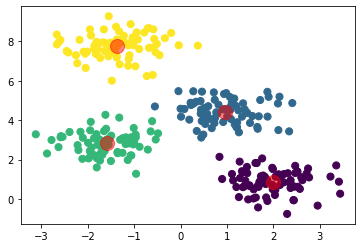

In [4]:
import numpy as np

class KMeans:
    def __init__(self, n_clusters=3, max_iter=300, tol=1e-4, init='k-means++'):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.tol = tol
        self.centroids = None
        self.labels = None
        self.init = init

    def initialize_centroids(self, X):
        if self.init == 'random':
            random_idx = np.random.choice(len(X), self.n_clusters, replace=False)
            centroids = X[random_idx]
        elif self.init == 'k-means++':
            centroids = [X[np.random.randint(len(X))]]
            for _ in range(1, self.n_clusters):
                dist_sq = np.array([min([np.inner(c-x, c-x) for c in centroids]) for x in X])
                probs = dist_sq / dist_sq.sum()
                cumulative_probs = probs.cumsum()
                r = np.random.rand()
                for j, p in enumerate(cumulative_probs):
                    if r < p:
                        centroids.append(X[j])
                        break
        return np.array(centroids)

    def compute_centroids(self, X, labels):
        return np.array([X[labels == i].mean(axis=0) for i in range(self.n_clusters)])

    def compute_distance(self, X, centroids):
        return np.sqrt(((X - centroids[:, np.newaxis])**2).sum(axis=2))

    def find_closest_cluster(self, distance):
        return np.argmin(distance, axis=0)

    def fit(self, X):
        self.centroids = self.initialize_centroids(X)
        for i in range(self.max_iter):
            old_centroids = self.centroids
            distance = self.compute_distance(X, self.centroids)
            self.labels = self.find_closest_cluster(distance)
            self.centroids = self.compute_centroids(X, self.labels)
            if np.all(np.abs(self.centroids - old_centroids) < self.tol):
                break

    def predict(self, X):
        distance = self.compute_distance(X, self.centroids)
        return self.find_closest_cluster(distance)
def silhouette_score(X, labels):
    from scipy.spatial.distance import cdist
    unique_labels = np.unique(labels)
    if len(unique_labels) == 1:
        return 0  # silhouette score is not defined for a single cluster

    result = 0
    for i in unique_labels:
        in_cluster = X[labels == i]
        out_cluster = X[labels != i]
        in_dist = cdist(in_cluster, in_cluster, 'euclidean')
        out_dist = cdist(in_cluster, out_cluster, 'euclidean')
        a = np.mean(in_dist, axis=1)
        b = np.min(np.mean(out_dist, axis=2), axis=1)
        s = (b - a) / np.maximum(a, b)
        result += np.mean(s)
    return result / len(unique_labels)

# Example usage with dummy data
if __name__ == "__main__":
    from sklearn.datasets import make_blobs
    X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

    kmeans = KMeans(n_clusters=4)
    kmeans.fit(X)

    import matplotlib.pyplot as plt
    plt.scatter(X[:, 0], X[:, 1], c=kmeans.predict(X), s=50, cmap='viridis')
    plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], s=200, c='red', alpha=0.5)
    plt.show()
